## Visualization of One Election 
#### It performs MDS on the data and outputs the candidates and voters positions on a single axis 


In [1]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from rcv_dimensionality import *
from voting_rules import *

##### Assign csv to the path of the file you are wishing to analyse

c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\team_arrow\clean\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Peltola, Mary S.': 0.0, 'Begich, Nick': 1.1700871471969492, 'Palin, Sarah': 2.0}


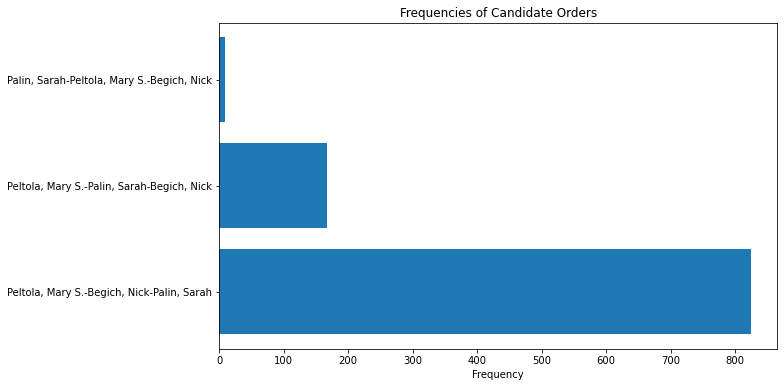

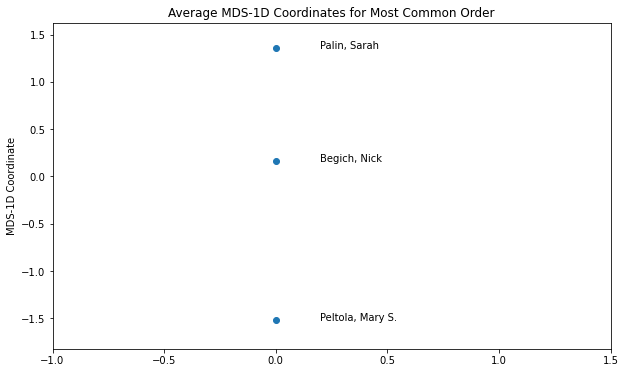

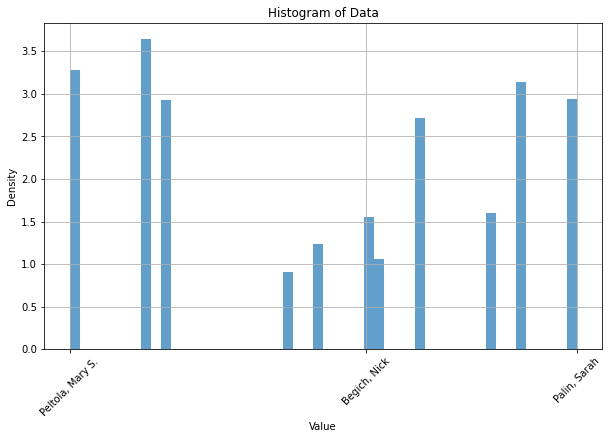

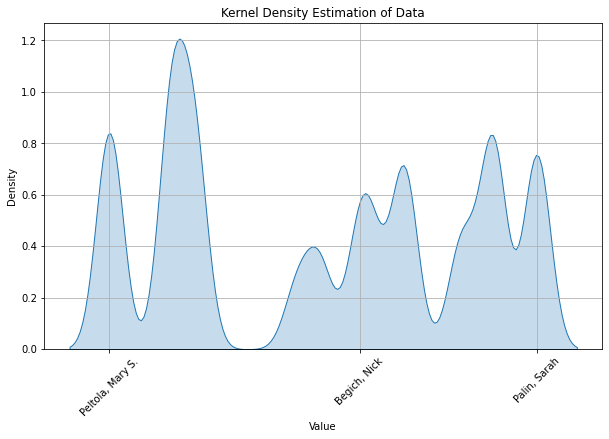

In [2]:
# Test the function with a custom CSV file
csv = "dataverse_files/Maine_11082022_CongressionalDistrict2.csv"

ballots, candidates = parse_election_data(csv)

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
print("Normalized distances:", normalized_distances)
plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

# Get the consistency points for the bimodality analysis
points = get_consistency_points(ballots, candidates, normalized_distances)

# Create a list of data points
data_points = []
for key, value in points.items():
    data_points.extend([key] * value)

# Convert to numpy array
data_points = np.array(data_points)

# Prepare data for histogram
data_list = [x for x, count in points.items() for _ in range(count)]

normalized_points = []
normalized_names = []
for name in normalized_distances:
    normalized_names.append(name)
    normalized_points.append(normalized_distances[name])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot kernal density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(data_list, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [6]:
print(ballots)

{('Peltola, Mary S.', 'Begich, Nick'): 26335, ('Peltola, Mary S.',): 23660, ('Peltola, Mary S.', 'Begich, Nick', 'Palin, Sarah'): 21154, ('Palin, Sarah',): 21186, ('Begich, Nick', 'Palin, Sarah', 'Peltola, Mary S.'): 7626, ('Begich, Nick',): 11208, ('Begich, Nick', 'Peltola, Mary S.', 'Palin, Sarah'): 8948, ('Peltola, Mary S.', 'Palin, Sarah', 'Begich, Nick'): 3287, ('Palin, Sarah', 'Begich, Nick'): 22639, ('Palin, Sarah', 'Begich, Nick', 'Peltola, Mary S.'): 11529, (): 3437, ('Begich, Nick', 'Peltola, Mary S.'): 6559, ('Begich, Nick', 'Palin, Sarah'): 19572, ('Peltola, Mary S.', 'Palin, Sarah'): 1443, ('Palin, Sarah', 'Peltola, Mary S.', 'Begich, Nick'): 2975, ('Palin, Sarah', 'Peltola, Mary S.'): 731}


#### run this cell to see the bimodality and gamma indices

In [10]:
#ballots, candidates = parse_election_data(csv)

# Calculate skewness and kurtosis
g = skew(data_points)
k = kurtosis(data_points)

# Calculate bimodality coefficient
n = len(data_points)
bimodality = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
print("Bimodality coefficient:", bimodality)
print("Gamma coefficiet:", get_gamma(normalized_distances, ballots))



Bimodality coefficient: 0.8542147110161119
Gamma coefficiet: 0.9343845018357073


#### winner under different RCV methods 

In [11]:
df = pd.DataFrame(ballots.keys(), ballots.values())
print(df)
df.to_csv("ballots.csv")

                       0                1                2
26           JULIO RAMOS       RANDY KNOX  ADRIAN BERMUDEZ
809          JOHN AVALOS       RANDY KNOX      JULIO RAMOS
62             MYRNA LIM      JOHN AVALOS  MARY GOODNATURE
84           JULIO RAMOS        MYRNA LIM             None
212            MYRNA LIM      JULIO RAMOS      AHSHA SAFAI
..                   ...              ...              ...
2        MARY GOODNATURE      ELI M. HORN       RANDY KNOX
3            ELI M. HORN      JULIO RAMOS  MARY GOODNATURE
1            ELI M. HORN  ADRIAN BERMUDEZ  MARY GOODNATURE
1            ELI M. HORN  MARY GOODNATURE      AHSHA SAFAI
1    A. JACKSON MATTESON        MYRNA LIM             None

[394 rows x 3 columns]


In [7]:

election = voting_rules(ballots, candidates)
print("IRV: ", election.irv())
print("Condorcet: ", election.condorcet())
print("Black: ", election.black())
print("Borda: ", election.borda())
print("Bucklin: ", election.bucklin())
print("Ranked Pairs: ", election.ranked_pairs())
print("Copeland: ", election.copeland())
print("mini_max: ", election.mini_max())
print("Plurality: ", election.plurality())
print("Majority: ", election.majority())
print("Approval: ", election.approval())

IRV:  RON ROSENBAUM
Condorcet:  RON ROSENBAUM
Black:  RON ROSENBAUM
Borda:  RON ROSENBAUM
Bucklin:  SADIA KHAN
Ranked Pairs:  RON ROSENBAUM
Copeland:  RON ROSENBAUM
mini_max:  RON ROSENBAUM
Plurality:  RON ROSENBAUM
Majority:  -1
Approval:  RON ROSENBAUM
